In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from typing import List
from skimage.feature import peak_local_max

In [2]:
def plot_figure(image_list: List[np.ndarray], title_list: List[str], height, width):
    assert len(image_list) == len(title_list)
    for i in range(len(image_list)):
        plt.subplot(height, width, i + 1), plt.imshow(image_list[i], 'gray')
        plt.title(title_list[i])
        plt.xticks([]), plt.yticks([])
    plt.show()

In [3]:
import skimage
def harris_corner_detector(img_path: str, alpha: int, block_size: int = 3, threshold_max_fraction: int=0.1):
    # asserting alpha is in the valid range
    assert (alpha <= 0.06 and alpha >= 0.04)
    # reading the image, converting it to gray scale in float pixels
    img = cv2.imread(img_path)
    #img= im.astype(float)
    if len(img.shape) > 2:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = skimage.img_as_float32(img)
    ## Applying gaussian blur to smooth the image for better performance
    img = cv2.GaussianBlur(img, (5, 5), 1)
    # Creating sobel filter to compute the gradient
    sobel_x = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    sobel_y = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    # Computing Gradient
    Ix_blur = cv2.filter2D(img, -1, sobel_x)
    Iy_blur = cv2.filter2D(img, -1, sobel_y)
    # Compting Ix^2, Iy^2 and Ix*Iy
    Ix2 = Ix_blur*Ix_blur
    Iy2 = Iy_blur*Iy_blur
    IxIy = Ix_blur*Iy_blur
    # In order to give them gaussian weights convolution with Gaussian filter is applied\
    # the filter size is equivalent to block size
    Ix2 = cv2.GaussianBlur(Ix2, (block_size, block_size), 1)
    Iy2 = cv2.GaussianBlur(Iy2, (block_size, block_size), 1)
    IxIy = cv2.GaussianBlur(IxIy, (block_size, block_size), 1)
    # Computing Corners with det(M) - alpha*(trace(M)**2)
    corner = np.zeros(img.shape)
    corner = Ix2*Iy2 - IxIy*IxIy - alpha*(Ix2+Iy2)**2
    threshold = np.max(corner)*threshold_max_fraction        
    ret, corner_image = cv2.threshold(corner, threshold, 1.0, 0)
    
    return corner_image
    
    

In [4]:
corner = harris_corner_detector('assets/corners.jpg', 0.04)

(17, 2)


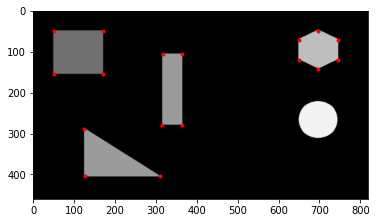

In [7]:
img = cv2.imread('assets/corners.jpg')
if len(img.shape) > 2:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')
corner_co = peak_local_max(corner, min_distance=20)
print(corner_co.shape)
plt.plot(corner_co[:, 1], corner_co[:, 0], 'r.')